# Introduction

In this assignment, I mainly review the content on LS and LMS, to get familar with the whole process on how to train the data, how to use the model to make prediction. Also practice on how to measure the accuracy of the model.

As to the implementation, I utilize the class that inherit from the super class, and then test with the preliminary test. 

In application, I use the data in dataset 'Bike Sharing Dataset Data Set', there are continuous and categorical value in our dataset, so I make necessary preprocessing. I divid the dataset into two parts, 80% is used to training, and 20% is used to predict. 

In LS, I make comparasion with keeping most of the variables(except the registered and casual, for 'cnt' is the sum of these two variables) and features that related to weather condition. The same comparasion was made with LMS. 

In order to compare the accuracy, I compare the target value with the predicted value, from my testing result, LS got lower error than LMS.


# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

## Description


### Introduction of data for regression

Bike Sharing Dataset Data Set 

Number of Instances: 17389

Number of Attributes: 16

Associated Tasks: Regression

Attribute Characteristics: Integer, Real

### Source of the data 
UCI Machine Learning Repository:


Bike Sharing Dataset Data Set


https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### Reading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("hour.csv")
print(df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

## Plots for understanding or analysis

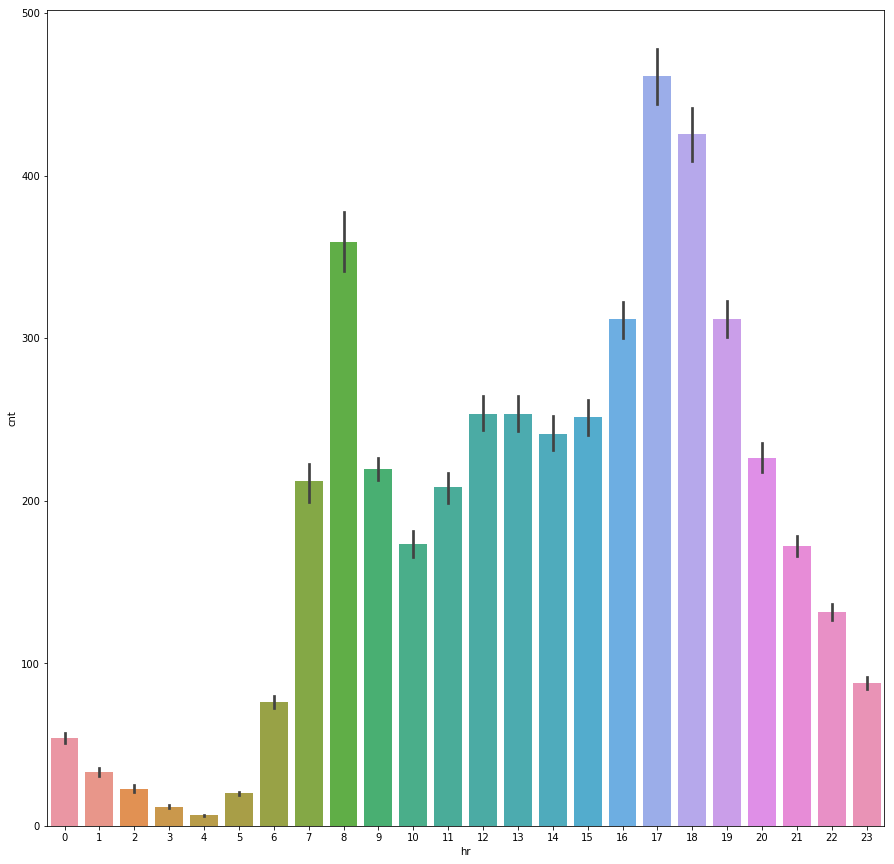

In [3]:
plt.figure(figsize=(15,15))
sns.barplot(data=df, x="hr", y="cnt")

From the barplot above, we can see that there are two peaks, one is 8am, the other is 5pm, which is reasonable, for this two are the rush hour in the morning and evening, so there is a high demand in renting bikes.

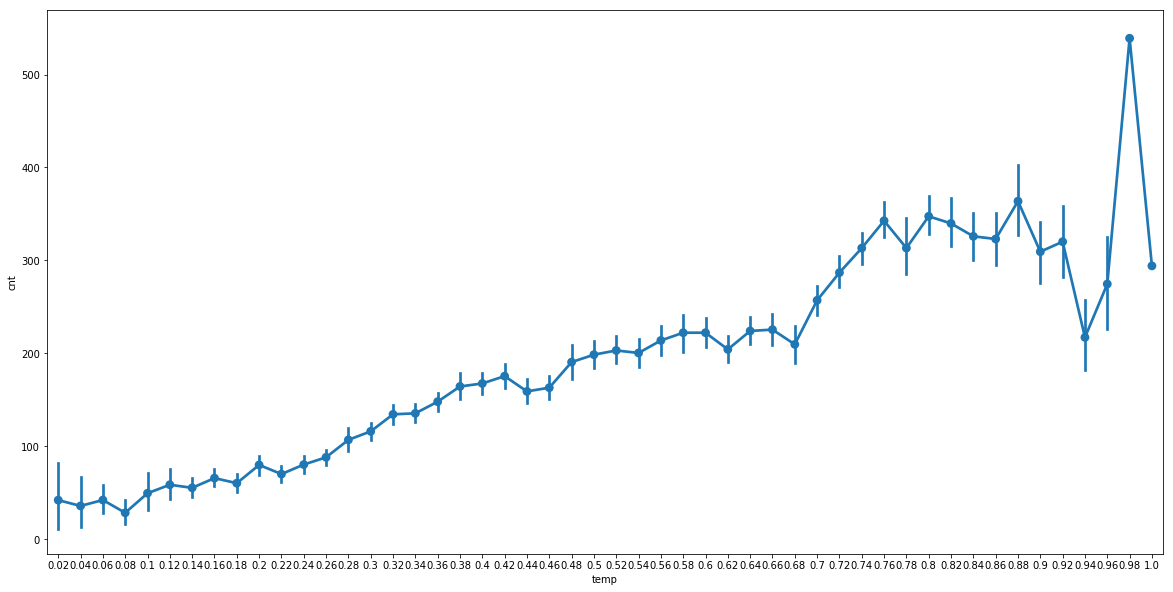

In [4]:
plt.figure(figsize=(20,10))
sns.pointplot(data=df, x="temp", y="cnt")

From the pointplot above, we can see that with the temp(temperature) raise, cnt(count) is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose rent bike.

## Preliminary observation

1. From the barplot, we can see that there are two peaks, one is 8am, the other is 5pm, which is reasonable, for this two are the rush hour in the morning and evening, so there is a high demand in renting bikes.

2. From the pointplot, we can see that with the temp(temperature) raise, cnt(count) is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose renting bike.

## Preprocessing of the data

Firstly, we need to check whether there is any NULL values

In [5]:
np.any(df.isnull())

False

Secondly, there are continuous and categorical value in our dataset, so we need to deal with the categorical value in our dataset.

In [6]:
dummy_fields = ['season', 'mnth', 'weekday', 'weathersit', 'hr']
for each in dummy_fields:
    dummies = pd.get_dummies( df.loc[:, each], prefix=each ) 
    df = pd.concat( [df, dummies], axis = 1)

# As cnt is the sum of registered and casual, so we remove them too.
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'mnth', 'workingday', 'hr', 'registered', 'casual']
df = df.drop(fields_to_drop, axis=1)

In [7]:
list(df.columns.values)

['yr',
 'holiday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23']

Then, we want to know more about the correlation between variables, especially the features with cnt(count).

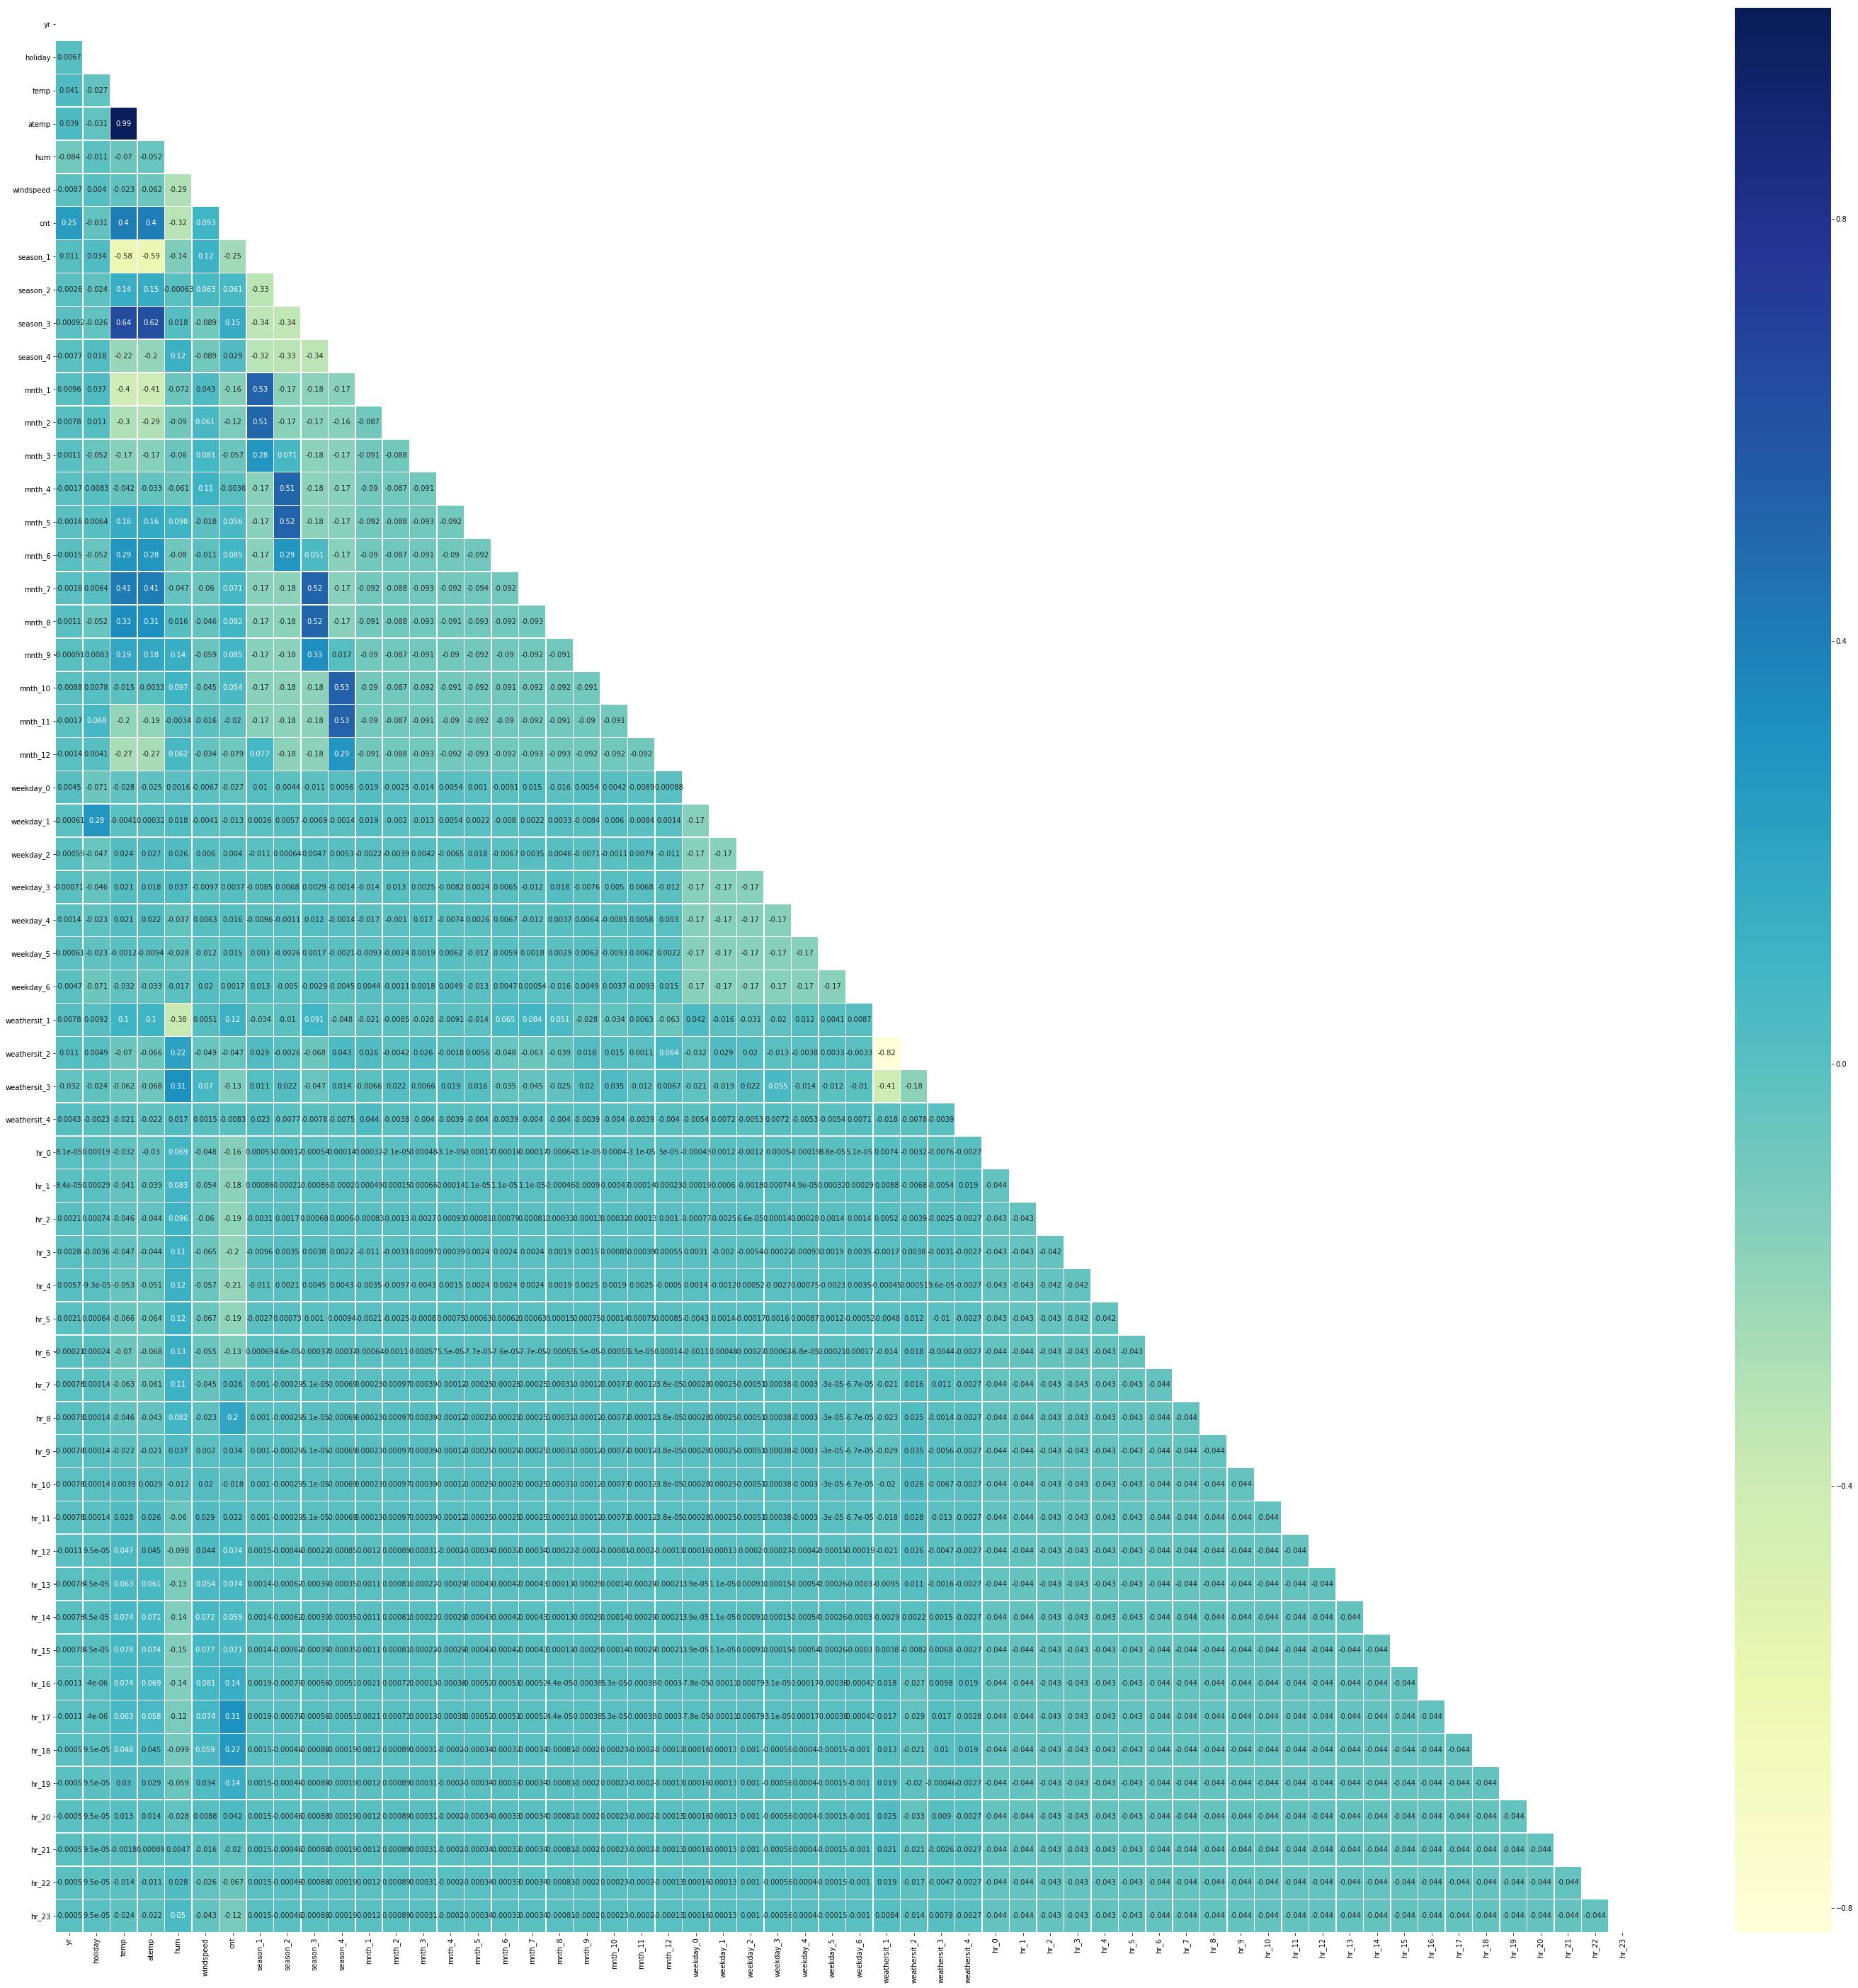

In [8]:
plt.figure(figsize=(50,50))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True, linewidths=.5)

From the heatmap above, we can get a shallow summary of the relationship between 'cnt' with the other features.
- the most related value are temp, atemp, hum, hr_17
- the least related value are weekday_2, weekday_3, weekday_6

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


## Review of the linear models 

### Linear model 
It can be defined as a Euclidean dot product between two vectors: 

$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. 



### Error (Cost) Function

When we define $w \in R^D$, the choice of $D$ real numbers can result in the best result. 
Here, the word "*best*" can be vague. Thus, we need to define what *best* means. 
The sum of square error function defines as follows:

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

This error function says that we want to minimize the sum of Euclidean distances between the target values and the model outputs. Here the square term leads the distances are not biased a few samples since sacrificing others with large errors will disturb the objective. 


### Least Squares

The parameter that gives best fit will be

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $w$ to zero. 
For this, let us prepare data in matrix. 
The target values are collected in matrix $T$, and the input samples are in matrix $X$.

$$
\begin{align}
T &= [t_1, t_2, \cdots, t_N]^\top \\ 
\\
w &= [w_0, w_1, \cdots, w_D]^\top \\
\\
X &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{d1} & x_{d2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$

With this matrix, $f(x; w)$ can be written in matrix form as:
$$
f(x; w) = X w.
$$
Thus, the error function can be
$$
\begin{align}
E(w) &= \sum_{i=1}^N \Big(f(x_i; w_i) - t_i \Big)^2 \\
            \\
            &= w^\top X^\top X w - 2 T^\top X w + T^\top T
\end{align}
$$
because $T^\top X w$ is a scalar, so symmetric. 

Now, let us do the derivative. R
$$
\begin{align}
\frac{\partial E(w)}{\partial w} &= \frac{\partial (X w - T)^\top (X w - T)}{\partial w} \\
        \\
        &= 2 X^\top X w - 2 X^\top T 
\end{align}
$$

Setting this to zero, 
$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$


### My implementation and description of Least Squares

In train, the main objective is to get w

With below equation:  

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$

we use np.linalg.lstsq together with input X and T to get the w.


In use, we can utilize the w we get from train, to give the proper prediction.




## Least Mean Squares (LMS)

Previously we observed that the least squares use all the available data for training or finding the best fit. 
This can be often computationally costly, especially with large data sets. When data is sufficiently large, we can consider *sequential* or *online* learning.
During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps. 

For this, we start with an initial guess $w$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $x_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big)x_k.
$$



### My implementation and description Least Mean Squares (LMS)

Firstly follow below equation

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big)x_k.
$$

we use train_step, by introducing data point one by one to update the parameters, self.w -= self.alpha * (y-t) * x  

Then, in train, we reuse train_step into the whole dataset.

Finally, with use function, we can get the proper prediction.


### Super Classs Definition

In [9]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [10]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        #self._check_matrix(self, X, X1)
        XTrain = self.add_ones(X)
        self.w = np.linalg.lstsq(XTrain.T @ XTrain, XTrain.T @ T)[0]
        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        XUse = self.add_ones(X)
        return XUse @ self.w
        pass  ## TODO: replace this with your codes

### Least Mean Squares

In [11]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,-1)
        x1 = self.add_ones(x)
        
        if self.w is None:
            self.w = np.zeros(x1.shape[1]).reshape(1,-1)
        
        self.w -= self.alpha * ((x1 @ self.w.T) - t) * x1      
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        return (self.add_ones(X)) @ self.w.T     
        pass  ## TODO: replace this with your codes
        

### Usage Examples

In [12]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

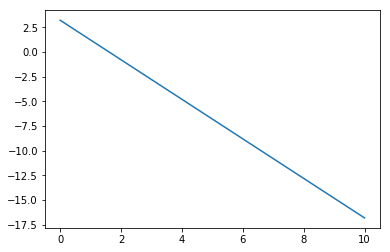

In [13]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

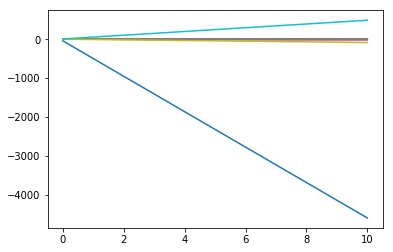

In [14]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

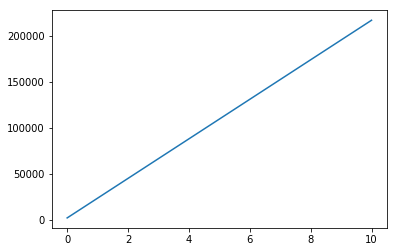

In [15]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


### First, we will work on LS model.

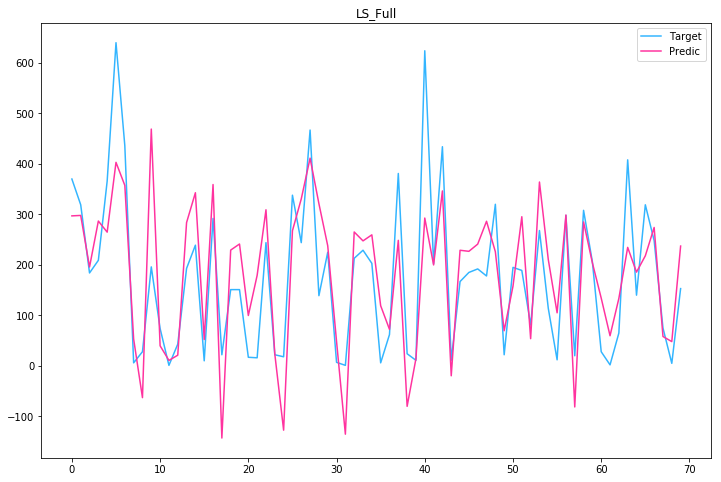

Error of LS_Full: 0.0294852563284
R_Squared [ 0.67201875]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as skl
from sklearn.preprocessing import normalize

from sklearn.metrics import mean_squared_error

# The fuction to plot
def plot(name, Ttarget, Tpredic):
    plt.figure(figsize=(12,8))
    plt.title(name)
    plt.plot(Ttarget[0::50], label='Target', color = '#33B5FF')
    plt.plot(Tpredic[0::50], label='Predic', color = '#FF339F')
    plt.legend()
    plt.show()
    
# The fuction to get rmse_val   
def rmse_val(T, Y):
    #return np.sqrt(np.sum((T-Y)**2))
    #return np.sqrt(mean_squared_error(T, Y))
    return np.sqrt(np.mean((T-Y)**2))/len(T)



# We divid the data into two parts, 80% for training, and 20 persent for testing.   
trainData = df.sample(frac = 0.80)
testData = df.sample(frac = 0.20)



XtrainFull = trainData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                        'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                        'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                        'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                        'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values

XtestFull = testData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                      'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                      'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                      'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                      'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18','hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values

# Next, we normalize the dataset.
XtrainFull = skl.preprocessing.normalize(trainData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                        'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                        'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                        'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                        'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)

XtestFull = skl.preprocessing.normalize(testData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                      'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                      'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                      'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                      'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18','hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)




Ttrain = trainData['cnt'].values.reshape(-1, 1)
Ttarget = testData['cnt'].values.reshape(-1, 1)

ls = LinearRegress()

ls.train(XtrainFull, Ttrain)


TpredicFull = ls.use(XtestFull)


plot('LS_Full', Ttarget, TpredicFull)


# get the error
Error_Full = rmse_val(Ttarget, TpredicFull)
print('Error of LS_Full:', Error_Full)

# Calculate R_Squared
Residual = np.sum((Ttarget-TpredicFull)**2)
Total = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared = 1 - (float(Residual))/Total
print('R_Squared', R_Squared )


Next, we pick some of the features that related to weather, to see the result

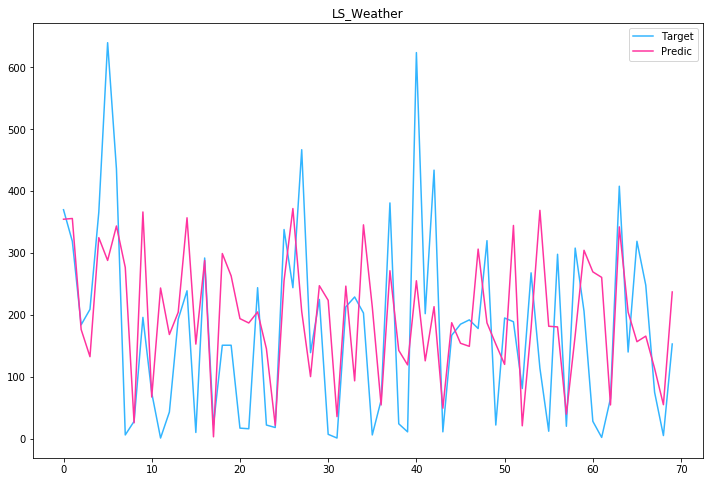

Error of LS_Weather: 0.0441108763815
R_Squared [ 0.26594166]


In [18]:
# Normalize the data with features that related to weather
XtrainWeather = skl.preprocessing.normalize(trainData[['windspeed','hum','temp','atemp']].values, axis=1, copy=True, return_norm=False)
XtestWeather = skl.preprocessing.normalize(testData[['windspeed','hum','temp','atemp']].values, axis=1, copy=True, return_norm=False)

#Ttrain = trainData['cnt'].values.reshape(-1, 1)
#Ttarget = testData['cnt'].values.reshape(-1, 1)

ls1 = LinearRegress()
ls1.train(XtrainWeather, Ttrain)

TpredicWeather = ls1.use(XtestWeather)

plot('LS_Weather', Ttarget, TpredicWeather)

# To get the error
Error_weather = rmse_val(Ttarget, TpredicWeather)
print('Error of LS_Weather:',Error_weather)

# Calculate R_Squared
Residual1 = np.sum((Ttarget-TpredicWeather)**2)
Total1 = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared1 = 1 - (float(Residual1))/Total1
print('R_Squared', R_Squared1 )


Discussion:

- When compare above predict result of LS model, we can see the linear model that based on most of the features gives a lower error, and the model based on features that related to weather gives a comparatively higher error.

### Next, we will work on LMS model.

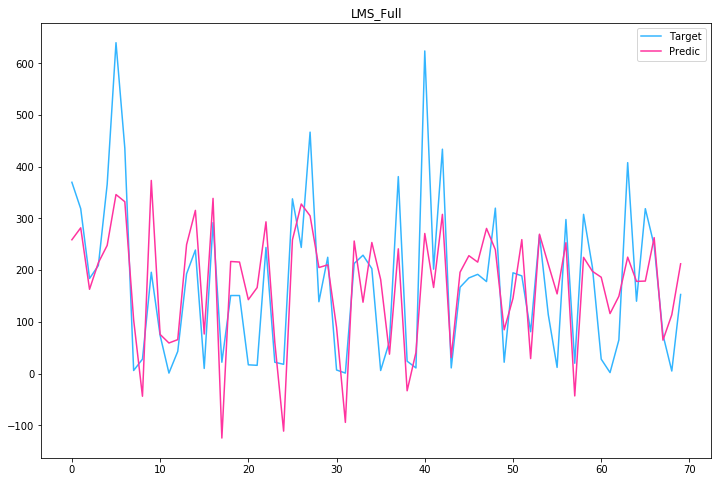

Error of LMS_Full : 0.0323359747903
R_Squared [ 0.6055326]


In [19]:
lms = LMS(0.01)

lms.train(XtrainFull,Ttrain)

Tpredic_lms_full = lms.use(XtestFull)

plot('LMS_Full', Ttarget, Tpredic_lms_full)

# To get the error
Error_lms = rmse_val(Ttarget, Tpredic_lms_full)
print('Error of LMS_Full :',Error_lms)


# Calculate the R_Squared
Residual2 = np.sum((Ttarget-Tpredic_lms_full)**2)
Total2 = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared2 = 1 - (float(Residual2))/Total2
print('R_Squared', R_Squared2 )

We also pick some of the features that related to weather, to see the result

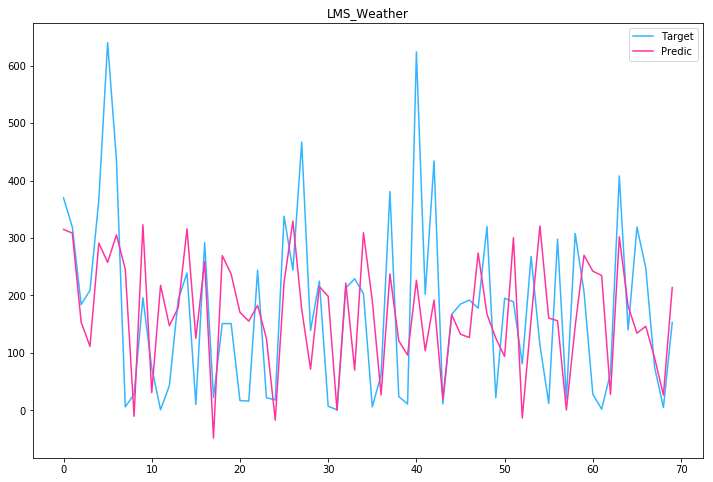

Error of LMS_Weather: 0.044713105564
R_Squared [ 0.24576119]


In [20]:
lms1 = LMS(0.01)

lms1.train(XtrainWeather, Ttrain)

Tpredic_lms_weather = lms1.use(XtestWeather)

plot('LMS_Weather', Ttarget, Tpredic_lms_weather)

# to get the error
Error_lms_weather = rmse_val(Ttarget, Tpredic_lms_weather)
print('Error of LMS_Weather:',Error_lms_weather)


# Calculate the R_Squared
Residual3 = np.sum((Ttarget-Tpredic_lms_weather)**2)
Total3 = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared3 = 1 - (float(Residual3))/Total3
print('R_Squared', R_Squared3 )

Discussion:

- We can see that in LMS model, when we just pick the weather related features, it has a higher erorr than picking most of the features.

- When we compare LS model with LMS model, we can see that with this dataset, LS model gives lower error when compared with LMS model.

# Conclusions

Discuss the challenges or somethat that you learned.  
If you have any suggestion about the assignment, you can write about it. 

- How to debug the error is a challenge to me.

- I get more familar with LS and LMS.

As to this dataset, from the regression result:
- When compare the result of LS model, we can see the linear model that based on most of the features gives a lower error, and the model based on features that related to weather gives a comparatively higher error.

- We can see that in LMS model, when we just pick the weather related features, it has a higher erorr than picking most of the features.

- When we compare LS model with LMS model, we can see that LS model gives lower error than that of LMS model

# References

http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb
http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
http://www.statisticshowto.com/residual-plot/
http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-27-linear.html

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 

### What is the most and least significant features for your data.

From the heatmap,  we can get a shallow summary of the relationship between 'cnt' with the other features.
- the most related value are temp, atemp, hum, hr_17
- the least related value are weekday_2, weekday_3, weekday_6

### What are the consequences if you remove those features from the model? (Show your work!)

I use the LS model as example, and make the testing below. When I remove the features from the model, there is change in the accuracy. Below is my testing results.

- If remove the most important features, there is big change in the model accuracy.

  The Error of LS_Full: 0.0294852563284, and the Error of LS_Remove_Important: 0.0301605894519
    
    
    
- If remove the least important feaures, there is a small change in model accurace.

  The Error of LS_Full: 0.0294852563284, and the Error of LS_Remove_Least: 0.0296366145123

Therefore, in order to raise the model accuracy, we need to find and keep the most important features in the model.

Firstly, we remove the most important features: temp, atemp, hr_17

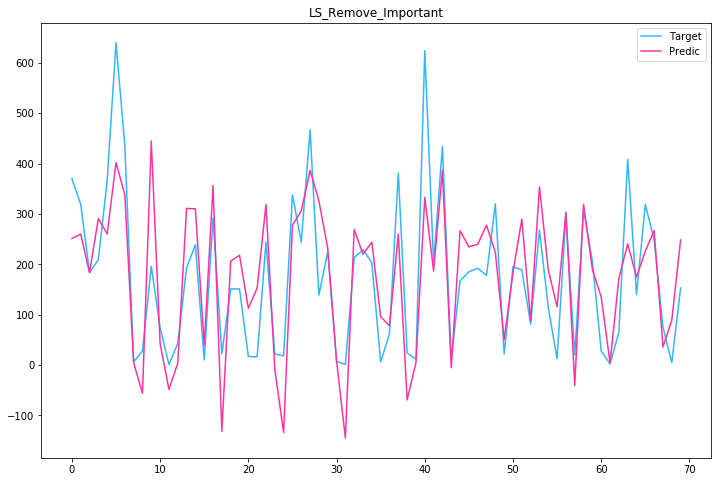

Error of LS_Remove_Important: 0.0301605894519
R_Squared [ 0.65682246]


In [21]:
XtrainRemoveImportant = skl.preprocessing.normalize(trainData[['yr', 'holiday','windspeed', 'season_1', 'season_2','season_3','season_4',
                        'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                        'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                        'weathersit_2', 'weathersit_3', 'weathersit_4','hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                        'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)

XtestRemoveImportant = skl.preprocessing.normalize(testData[['yr', 'holiday','windspeed', 'season_1', 'season_2','season_3','season_4',
                        'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                        'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
                        'weathersit_2', 'weathersit_3', 'weathersit_4','hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                        'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)


Ttrain = trainData['cnt'].values.reshape(-1, 1)
Ttarget = testData['cnt'].values.reshape(-1, 1)

ls_RemoveImportant = LinearRegress()

ls_RemoveImportant.train(XtrainRemoveImportant, Ttrain)

TpredicRemoveImportant = ls_RemoveImportant.use(XtestRemoveImportant)

#plot('LS', Ttarget, Tpredic)
plot('LS_Remove_Important', Ttarget, TpredicRemoveImportant)


# get the error
Error_Remove_Important = rmse_val(Ttarget, TpredicRemoveImportant)
print('Error of LS_Remove_Important:', Error_Remove_Important)

# Calculate R_Squared
Residual4 = np.sum((Ttarget-TpredicRemoveImportant)**2)
Total4 = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared4 = 1 - (float(Residual4))/Total4
print('R_Squared', R_Squared4 )



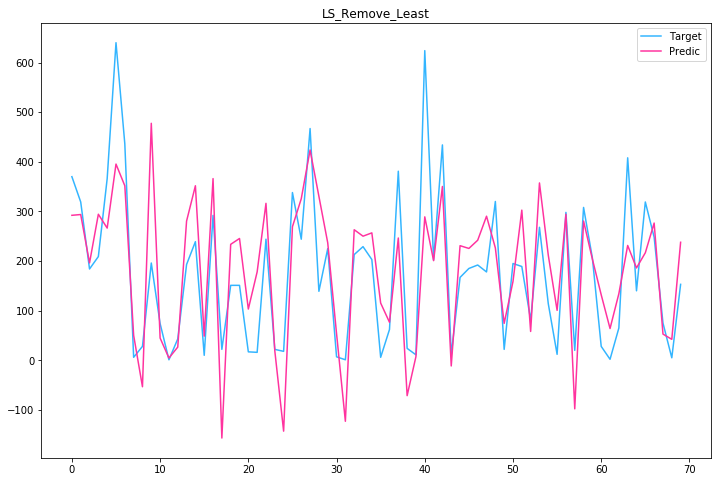

Error of LS_Remove_Least: 0.0296366145123
R_Squared [ 0.66864282]


In [22]:
XtrainRemoveLeast = skl.preprocessing.normalize(trainData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                      'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                      'weekday_0','weekday_1','weekday_4', 'weekday_5', 'weathersit_1',
                      'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                      'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18','hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)



XtestRemoveLeast= skl.preprocessing.normalize(testData[['yr', 'holiday','temp','atemp','hum','windspeed', 'season_1', 'season_2','season_3','season_4',
                      'mnth_1','mnth_2','mnth_3', 'mnth_4','mnth_5', 'mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                      'weekday_0','weekday_1','weekday_4', 'weekday_5', 'weathersit_1',
                      'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
                      'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17','hr_18','hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']].values, axis=1, copy=True, return_norm=False)




ls_RemoveLeast = LinearRegress()

ls_RemoveLeast.train(XtrainRemoveLeast, Ttrain)

TpredicRemoveLeast = ls_RemoveLeast.use(XtestRemoveLeast)

#plot('LS', Ttarget, Tpredic)
plot('LS_Remove_Least', Ttarget, TpredicRemoveLeast)


# get the error
Error_Remove_Least = rmse_val(Ttarget, TpredicRemoveLeast)
print('Error of LS_Remove_Least:', Error_Remove_Least)

# Calculate R_Squared
Residual5 = np.sum((Ttarget-TpredicRemoveLeast)**2)
Total5 = sum((Ttarget-np.mean(Ttarget))**2)
R_Squared5 = 1 - (float(Residual5))/Total5
print('R_Squared', R_Squared5 )


### Produce residual plots and observe the patterns for the goodness of fit 

Residual = Observed value – predicted value e = y – ŷ

The most useful way to plot the residuals, though, is with our predicted values on the x-axis, and our residuals on the y-axis.

From the residual plots below, what I have observed the patterns of the goodness of  fit is that it is more likely a discrete random variable.

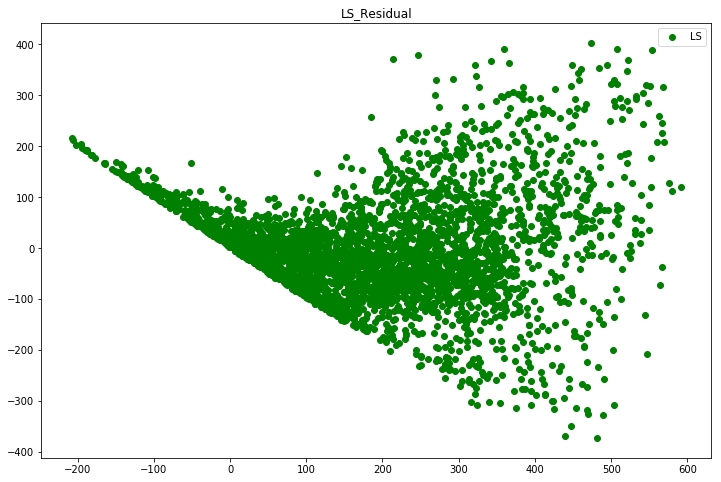

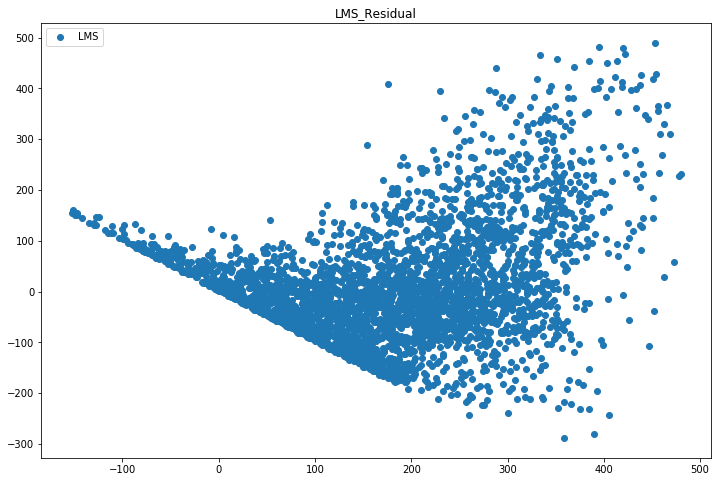

In [23]:
Residual_LS_Full = Ttarget - TpredicFull
Residual_LMS_Full = Ttarget - Tpredic_lms_full


plt.figure(figsize=(12,8))
plt.scatter(TpredicFull, Residual_LS_Full, marker='o', color = 'Green', label='LS')
plt.title('LS_Residual')
plt.legend()


plt.figure(figsize=(12,8))
plt.scatter(Tpredic_lms_full, Residual_LMS_Full, label='LMS')
plt.title('LMS_Residual')
plt.legend()


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [24]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
